In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_attrition= pd.read_excel('Employee Attrition Details.xlsx')
df_employee_info = pd.read_excel('Demographic information.xlsx')
df_job_satisfaction= pd.read_excel('Emp_Satisfaction_Survey_info.xlsx')
df_job_details= pd.read_excel('Employee Job Info.xlsx')
print(df_attrition.shape)
print(df_employee_info.shape)
print(df_job_satisfaction.shape)
print(df_job_details.shape)

(1470, 2)
(1470, 7)
(1470, 6)
(1470, 18)


In [3]:
df_attrition.head()

,EmployeeNumber,Attrition
0,1,Yes
1,4,Yes
2,19,Yes
3,27,Yes
4,31,Yes


In [4]:
df_attrition.dtypes


EmployeeNumber     int64
Attrition         object
dtype: object

In [5]:
#Check null values
df_attrition.isnull().sum()



EmployeeNumber    0
Attrition         0
dtype: int64

In [6]:
#Check duplicates
df_attrition.duplicated().sum()


0

In [7]:
#Check special characters
print(df_attrition[df_attrition['Attrition'].str.contains(r'[$#?@]', na=False)])



Empty DataFrame
Columns: [EmployeeNumber, Attrition]
Index: []


In [8]:
df_employee_info.head()

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18
0,1,41.0,College,Life Sciences,Female,Single,Y
1,2,49.0,Below College,Life Sciences,Male,Married,Y
2,4,37.0,College,Other,Male,Single,Y
3,5,33.0,Master,Life Sciences,Female,Married,Y
4,7,27.0,Below College,Medical,Male,Married,Y


In [9]:
df_employee_info.dtypes

EmployeeNumber      int64
Age               float64
Education          object
EducationField     object
Gender             object
MaritalStatus      object
Over18             object
dtype: object

In [10]:
#Check special characters
print(df_employee_info[df_employee_info['Education'].str.contains(r'[$#?@]', na=False)])
print(df_employee_info[df_employee_info['EducationField'].str.contains(r'[$#?@]', na=False)])
print(df_employee_info[df_employee_info['Gender'].str.contains(r'[$#?@]', na=False)])
print(df_employee_info[df_employee_info['MaritalStatus'].str.contains(r'[$#?@]', na=False)])
print(df_employee_info[df_employee_info['Over18'].str.contains(r'[$#?@]', na=False)])


Empty DataFrame
Columns: [EmployeeNumber, Age, Education, EducationField, Gender, MaritalStatus, Over18]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, Age, Education, EducationField, Gender, MaritalStatus, Over18]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, Age, Education, EducationField, Gender, MaritalStatus, Over18]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, Age, Education, EducationField, Gender, MaritalStatus, Over18]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, Age, Education, EducationField, Gender, MaritalStatus, Over18]
Index: []


In [11]:
#Check null values
df_employee_info.isnull().sum()


EmployeeNumber    0
Age               4
Education         5
EducationField    8
Gender            3
MaritalStatus     3
Over18            6
dtype: int64

In [12]:
#Impute null values

df_employee_info['Age'].fillna(df_employee_info['Age'].median(), inplace=True)
df_employee_info['Education'].fillna(df_employee_info['Education'].mode()[0], inplace=True)
df_employee_info['EducationField'].fillna(df_employee_info['EducationField'].mode()[0], inplace=True)
df_employee_info['Gender'].fillna(df_employee_info['Gender'].mode()[0], inplace=True)
df_employee_info['MaritalStatus'].fillna(df_employee_info['Gender'].mode()[0], inplace=True)
df_employee_info['Over18'].fillna(df_employee_info['Gender'].mode()[0], inplace=True)


In [13]:
#Check duplicates

df_employee_info.duplicated().sum()


0

In [14]:
#Check for outliers

Q1 = df_employee_info['Age'].quantile(0.25)
Q3 = df_employee_info['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_employee_info[(df_employee_info['Age'] < (Q1 - 1.5 * IQR)) | (df_employee_info['Age'] > (Q3 + 1.5 * IQR))]
outliers

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18


In [15]:
df_job_satisfaction.head()

,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance
0,2,High,Medium,Medium,Very High,Better
1,10,High,Very High,Low,Low,Good
2,13,High,High,High,Medium,Good
3,19,High,Medium,High,Medium,Better
4,27,High,Medium,Low,Medium,Better


In [16]:
df_job_satisfaction.dtypes

EmployeeNumber                       int64
EnvironmentSatisfaction             object
JobInvolvement                      object
JobSatisfaction                     object
Manager_RelationshipSatisfaction    object
WorkLifeBalance                     object
dtype: object

In [17]:
#Check special characters

print(df_job_satisfaction[df_job_satisfaction['EnvironmentSatisfaction'].str.contains(r'[$#?@]', na=False)])
print(df_job_satisfaction[df_job_satisfaction['JobInvolvement'].str.contains(r'[$#?@]', na=False)])
print(df_job_satisfaction[df_job_satisfaction['JobSatisfaction'].str.contains(r'[$#?@]', na=False)])
print(df_job_satisfaction[df_job_satisfaction['Manager_RelationshipSatisfaction'].str.contains(r'[$#?@]', na=False)])
print(df_job_satisfaction[df_job_satisfaction['WorkLifeBalance'].str.contains(r'[$#?@]', na=False)])



Empty DataFrame
Columns: [EmployeeNumber, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, Manager_RelationshipSatisfaction, WorkLifeBalance]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, Manager_RelationshipSatisfaction, WorkLifeBalance]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, Manager_RelationshipSatisfaction, WorkLifeBalance]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, Manager_RelationshipSatisfaction, WorkLifeBalance]
Index: []
Empty DataFrame
Columns: [EmployeeNumber, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, Manager_RelationshipSatisfaction, WorkLifeBalance]
Index: []


In [18]:
#Check null values

df_job_satisfaction.isnull().sum()


EmployeeNumber                      0
EnvironmentSatisfaction             0
JobInvolvement                      0
JobSatisfaction                     0
Manager_RelationshipSatisfaction    0
WorkLifeBalance                     0
dtype: int64

In [19]:
#Check duplicates

df_job_satisfaction.duplicated().sum()


0

In [20]:
df_job_details.head()

,EmployeeNumber,Department,BusinessTravel,DistanceFromHome,JobInvolvement,JobLevel,JobRole,MonthlySalary,NumCompaniesWorked,OverTime,PercentSalaryHike_last_year,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,103,Human Resources,Travel_Rarely,5,High,2.0,Human Resources,5021.0,8.0,Yes,22.0,Outstanding,1.0,2,4,2,0,2
1,133,Human Resources,Travel_Rarely,6,High,1.0,Human Resources,2073.0,4.0,Yes,22.0,Outstanding,0.0,3,3,2,0,2
2,140,Human Resources,Non-Travel,2,Medium,5.0,Manager,18844.0,9.0,No,21.0,Outstanding,1.0,3,3,2,2,2
3,148,Human Resources,Non-Travel,26,Very High,4.0,Manager,17328.0,NaN,Yes,12.0,Excellent,0.0,3,5,3,4,4
4,177,Human Resources,Travel_Rarely,25,High,1.0,Human Resources,2942.0,1.0,No,23.0,Outstanding,1.0,3,8,7,5,7


In [21]:
df_job_details.dtypes

EmployeeNumber                   int64
Department                      object
BusinessTravel                  object
DistanceFromHome                 int64
JobInvolvement                  object
JobLevel                       float64
JobRole                         object
MonthlySalary                  float64
NumCompaniesWorked             float64
OverTime                        object
PercentSalaryHike_last_year    float64
PerformanceRating               object
StockOptionLevel               float64
TrainingTimesLastYear            int64
YearsAtCompany                   int64
YearsInCurrentRole               int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
dtype: object

In [22]:
#Check  null values

df_job_details.isnull().sum()


EmployeeNumber                 0
Department                     0
BusinessTravel                 0
DistanceFromHome               0
JobInvolvement                 1
JobLevel                       1
JobRole                        1
MonthlySalary                  3
NumCompaniesWorked             3
OverTime                       1
PercentSalaryHike_last_year    1
PerformanceRating              1
StockOptionLevel               2
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
dtype: int64

In [23]:
#Impute null values

df_job_details['JobInvolvement'].fillna(df_job_details['JobInvolvement'].mode()[0], inplace=True)
df_job_details['JobLevel'].fillna(df_job_details['JobLevel'].median(), inplace=True)
df_job_details['JobRole'].fillna(df_job_details['JobRole'].mode()[0], inplace=True)
df_job_details['MonthlySalary'].fillna(df_job_details['MonthlySalary'].median(), inplace=True)
df_job_details['NumCompaniesWorked'].fillna(df_job_details['NumCompaniesWorked'].median(), inplace=True)
df_job_details['OverTime'].fillna(df_job_details['OverTime'].mode()[0], inplace=True)
df_job_details['PercentSalaryHike_last_year'].fillna(df_job_details['PercentSalaryHike_last_year'].median(), inplace=True)
df_job_details['PerformanceRating'].fillna(df_job_details['PerformanceRating'].mode()[0], inplace=True)
df_job_details['StockOptionLevel'].fillna(df_job_details['StockOptionLevel'].median(), inplace=True)


In [24]:
#Check duplicates

df_job_details.duplicated().sum()


0

In [25]:
#Check outliers

Q1 = df_job_details['MonthlySalary'].quantile(0.25)
Q3 = df_job_details['MonthlySalary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_job_details[(df_job_details['MonthlySalary'] < (Q1 - 1.5 * IQR)) | (df_job_details['MonthlySalary'] > (Q3 + 1.5 * IQR))]
outliers

,EmployeeNumber,Department,BusinessTravel,DistanceFromHome,JobInvolvement,JobLevel,JobRole,MonthlySalary,NumCompaniesWorked,OverTime,PercentSalaryHike_last_year,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,140,Human Resources,Non-Travel,2,Medium,5.0,Manager,18844.0,9.0,No,21.0,Outstanding,1.0,3,3,2,2,2
3,148,Human Resources,Non-Travel,26,Very High,4.0,Manager,17328.0,2.0,Yes,12.0,Excellent,0.0,3,5,3,4,4
12,644,Human Resources,Travel_Frequently,3,High,5.0,Manager,18200.0,1.0,No,11.0,Excellent,1.0,2,32,5,10,7
15,731,Human Resources,Travel_Rarely,10,Medium,5.0,Manager,19141.0,3.0,No,15.0,Excellent,3.0,2,21,6,12,6
16,734,Human Resources,Travel_Rarely,1,Medium,5.0,Manager,19189.0,1.0,No,12.0,Excellent,1.0,3,22,7,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1578,Sales,Travel_Rarely,26,Medium,5.0,Manager,19586.0,1.0,No,21.0,Outstanding,1.0,3,36,6,2,13
1364,1591,Sales,Travel_Rarely,9,High,5.0,Manager,19331.0,4.0,Yes,16.0,Excellent,1.0,2,1,0,0,0
1366,1602,Sales,Travel_Rarely,1,Very High,4.0,Manager,17567.0,1.0,No,15.0,Excellent,0.0,5,26,0,0,12
1394,1740,Sales,Travel_Rarely,7,High,5.0,Manager,19833.0,1.0,No,14.0,Excellent,0.0,3,21,8,12,8


In [26]:
# Replace outliers with the median of the column

median_salary = df_job_details['MonthlySalary'].median()
df_job_details['MonthlySalary'] = df_job_details['MonthlySalary'].apply(
    lambda x: median_salary if x < (Q1 - 1.5 * IQR) or x > (Q3 + 1.5 * IQR) else x
)


In [27]:
# Merging the DataFrames

final_data = df_attrition.merge(df_employee_info, on='EmployeeNumber', how='left')\
                         .merge(df_job_satisfaction, on='EmployeeNumber', how='left')\
                         .merge(df_job_details, on='EmployeeNumber', how='left')



In [28]:
final_data.head()

,EmployeeNumber,Attrition,Age,Education,EducationField,Gender,MaritalStatus,Over18,EnvironmentSatisfaction,JobInvolvement_x,...,NumCompaniesWorked,OverTime,PercentSalaryHike_last_year,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41.0,College,Life Sciences,Female,Single,Y,Medium,High,...,8.0,Yes,11.0,Excellent,0.0,0,6,4,0,5
1,4,Yes,37.0,College,Other,Male,Single,Y,Very High,Medium,...,6.0,Yes,15.0,Excellent,0.0,3,0,0,0,0
2,19,Yes,28.0,Bachelor,Life Sciences,Male,Single,Y,High,Medium,...,5.0,Yes,14.0,Excellent,0.0,4,4,2,0,3
3,27,Yes,36.0,Master,Life Sciences,Male,Single,Y,High,Medium,...,7.0,No,23.0,Outstanding,0.0,4,5,3,0,3
4,31,Yes,34.0,Below College,Medical,Male,Single,Y,Medium,High,...,2.0,No,11.0,Excellent,0.0,2,4,2,1,3


In [29]:
final_data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'Education', 'EducationField',
       'Gender', 'MaritalStatus', 'Over18', 'EnvironmentSatisfaction',
       'JobInvolvement_x', 'JobSatisfaction',
       'Manager_RelationshipSatisfaction', 'WorkLifeBalance', 'Department',
       'BusinessTravel', 'DistanceFromHome', 'JobInvolvement_y', 'JobLevel',
       'JobRole', 'MonthlySalary', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike_last_year', 'PerformanceRating', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
#Find metrics for numerical columns

metrics = {}

# Loop through each numerical column
for column in final_data.select_dtypes(include=['number']).columns:
    metrics[column] = {
        'Number of values': final_data[column].count(),
        'Number of missing values': final_data[column].isnull().sum(),
        'Number of distinct values': final_data[column].nunique(),
        'Number of zeros': (final_data[column] == 0).sum(),
        'Sum': final_data[column].sum(),
        'Mean': final_data[column].mean(),
        'Median': final_data[column].median(),
        'Std': final_data[column].std(),
        'Variance': final_data[column].var(),
        'Min': final_data[column].min(),
        'Max': final_data[column].max(),
        'Range': final_data[column].max() - final_data[column].min(),
        'P1': final_data[column].quantile(0.01),
        'P5': final_data[column].quantile(0.05),
        'P10': final_data[column].quantile(0.10),
        'P25': final_data[column].quantile(0.25),
        'P50': final_data[column].quantile(0.50),
        'P75': final_data[column].quantile(0.75),
        'P90': final_data[column].quantile(0.90),
        'P95': final_data[column].quantile(0.95),
        'P99': final_data[column].quantile(0.99)
    }

# Convert metrics to a DataFrame for easier viewing
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                             Number of values  Number of missing values  \
EmployeeNumber                         1470.0                       0.0   
Age                                    1470.0                       0.0   
DistanceFromHome                       1470.0                       0.0   
JobLevel                               1470.0                       0.0   
MonthlySalary                          1470.0                       0.0   
NumCompaniesWorked                     1470.0                       0.0   
PercentSalaryHike_last_year            1470.0                       0.0   
StockOptionLevel                       1470.0                       0.0   
TrainingTimesLastYear                  1470.0                       0.0   
YearsAtCompany                         1470.0                       0.0   
YearsInCurrentRole                     1470.0                       0.0   
YearsSinceLastPromotion                1470.0                       0.0   
YearsWithCurrManager     

In [31]:
#Find metrics for categorical columns

categorical_metrics = {}

# Loop through each categorical column
for column in final_data.select_dtypes(include=['object', 'category']).columns:
    frequency = final_data[column].value_counts()  # Frequency of each category
    categorical_metrics[column] = {
        'Number of values': final_data[column].count(),
        'Number of missing values': final_data[column].isnull().sum(),
        'Number of distinct values': final_data[column].nunique(),
        'Frequency': frequency.to_dict()  # Convert frequency Series to a dictionary
    }

# Convert metrics to a DataFrame for easier viewing
categorical_metrics_df = pd.DataFrame(categorical_metrics).T
print(categorical_metrics_df)


                                 Number of values Number of missing values  \
Attrition                                    1470                        0   
Education                                    1470                        0   
EducationField                               1470                        0   
Gender                                       1470                        0   
MaritalStatus                                1470                        0   
Over18                                       1470                        0   
EnvironmentSatisfaction                      1470                        0   
JobInvolvement_x                             1470                        0   
JobSatisfaction                              1470                        0   
Manager_RelationshipSatisfaction             1470                        0   
WorkLifeBalance                              1470                        0   
Department                                   1470               

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Define function for plotting histogrmas for numerical columns


import matplotlib.pyplot as plt

def plot_histograms(dataframe):
    numerical_cols = dataframe.select_dtypes(include=['number']).columns
    
    # Set the number of subplots
    num_cols = 3  # Number of columns in the plot grid
    num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)
    
    plt.figure(figsize=(15, num_rows * 5))  
    for i, column in enumerate(numerical_cols):
        plt.subplot(num_rows, num_cols, i + 1)  # Create subplot
        sns.histplot(dataframe[column], bins=20, kde=True)  # Histogram with density plot
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()  
    plt.show()



C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

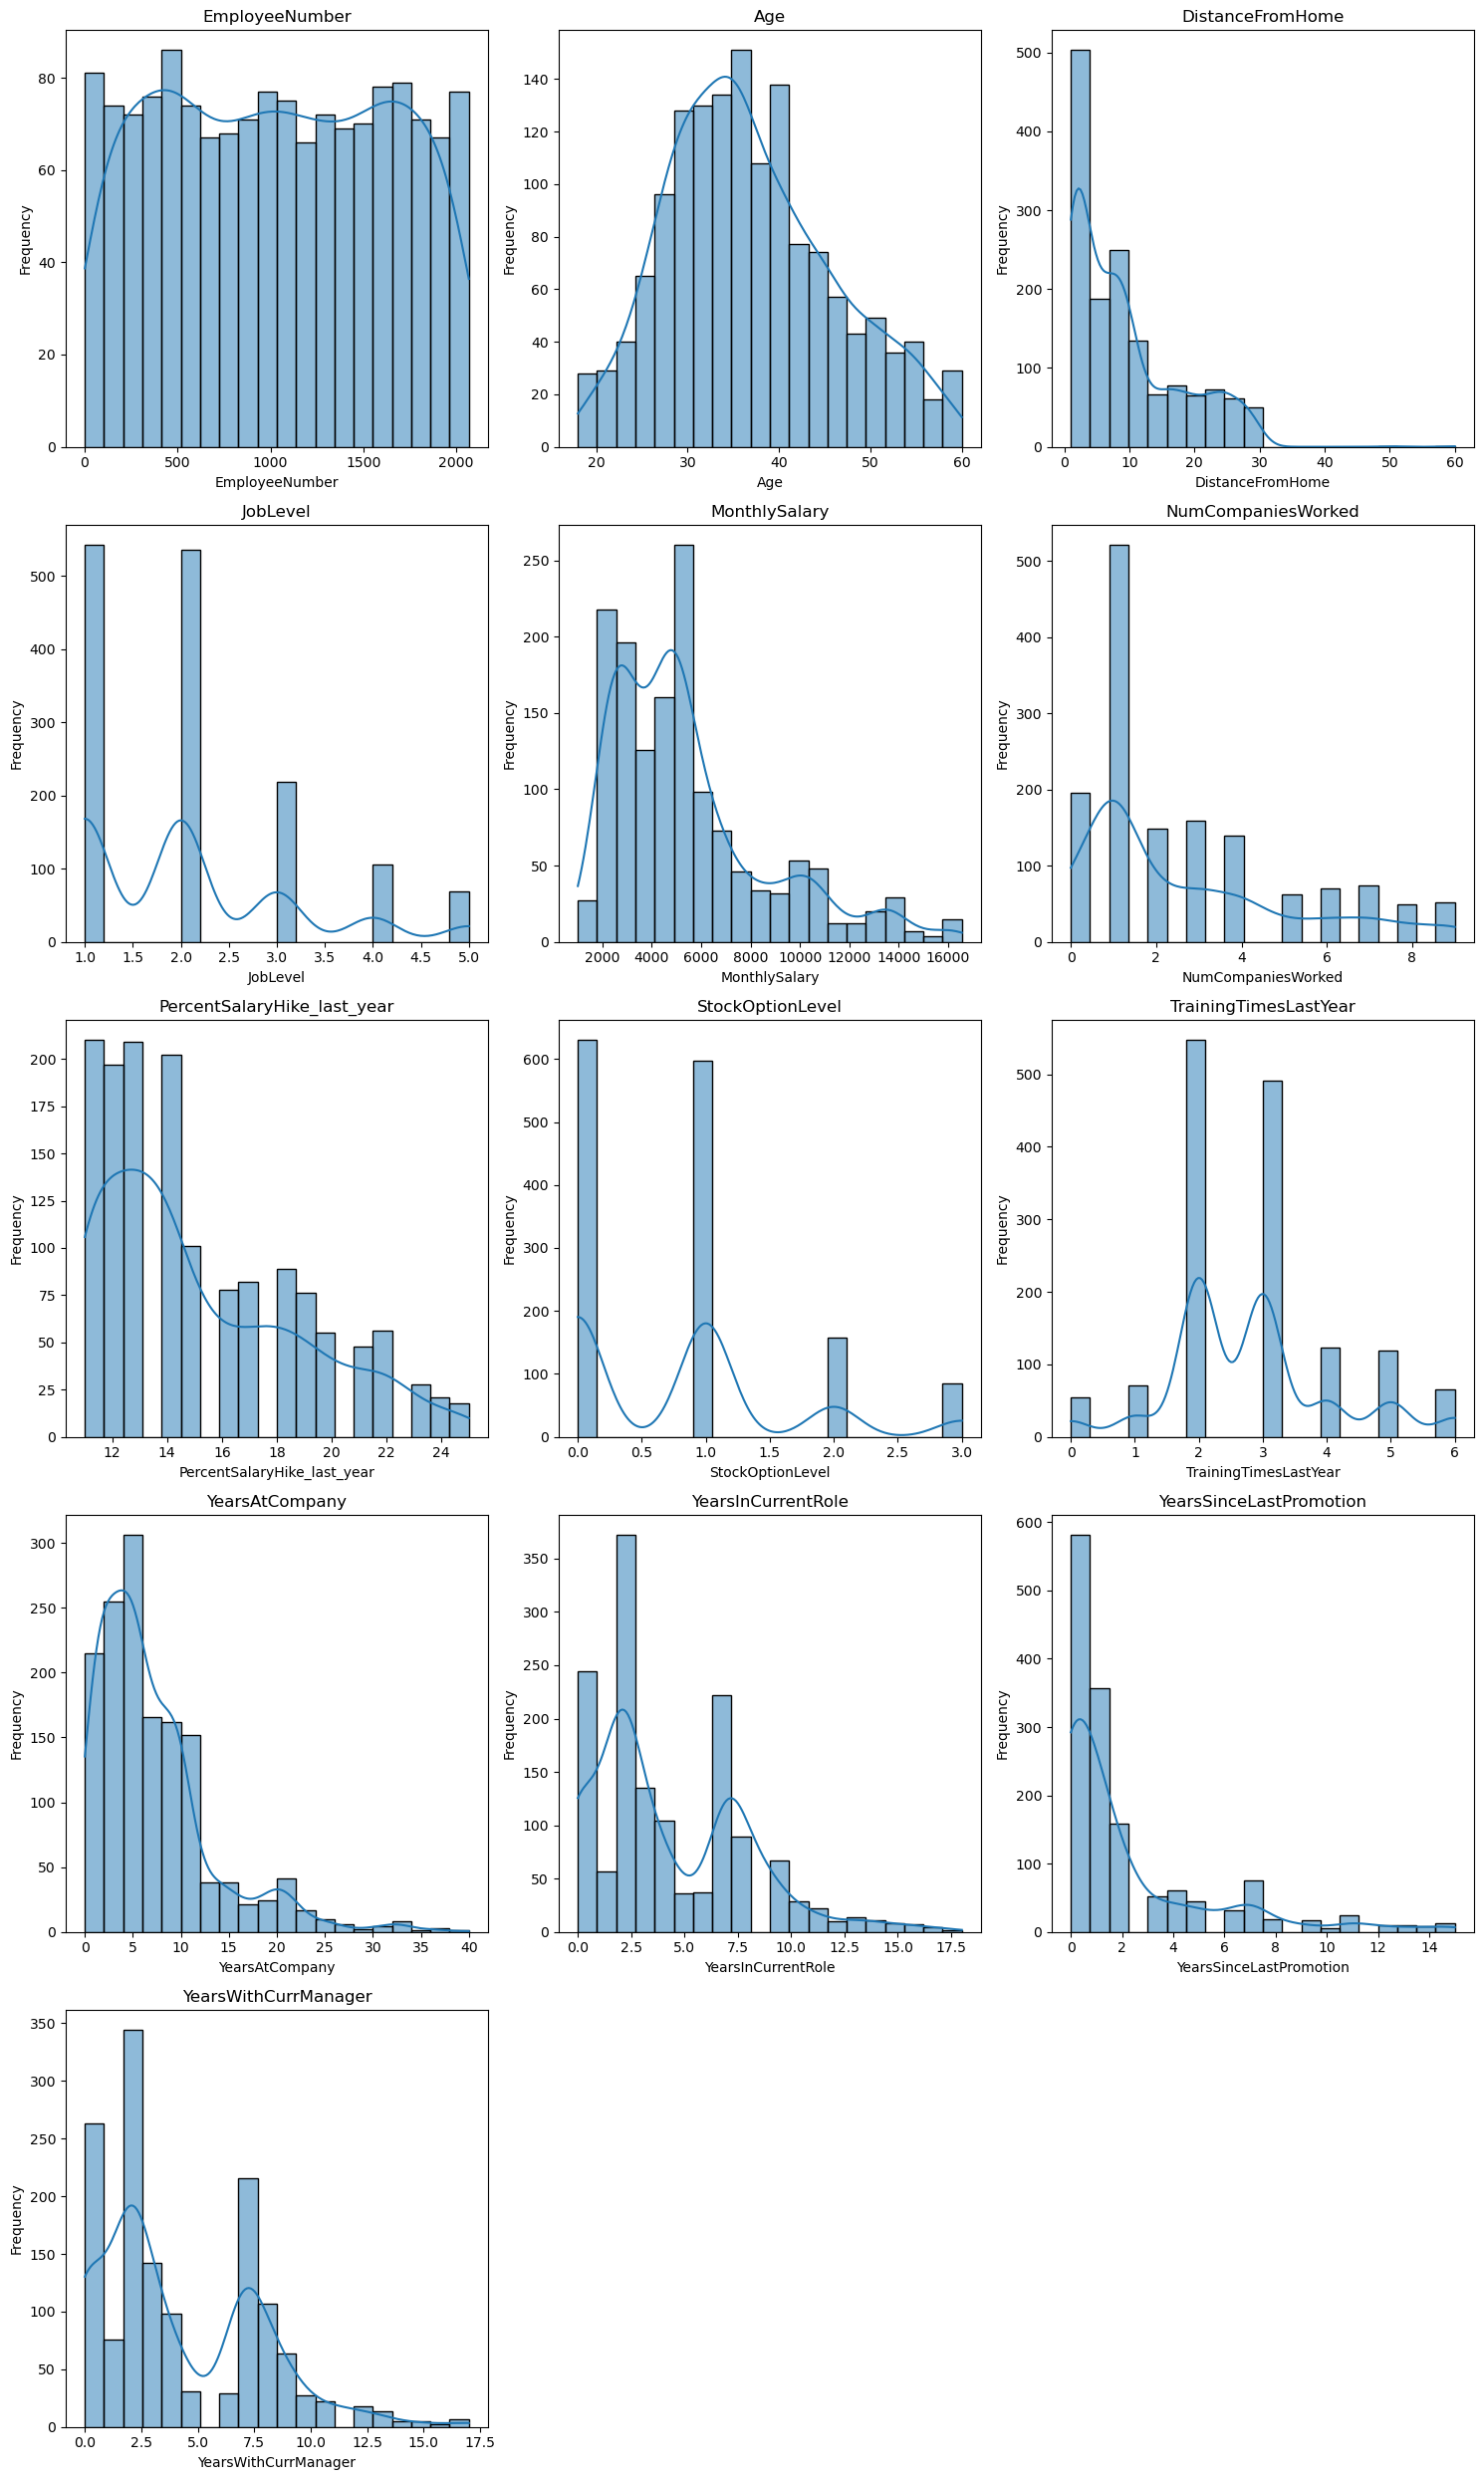

In [34]:
plot_histograms(final_data)

In [35]:
#Define function for plotting bar charts for categorical columns


def plot_barcharts(dataframe):
    categorical_cols = dataframe.select_dtypes(include=['object']).columns
    
    # Set the number of subplots
    num_cols = 3  # Number of columns in the plot grid
    num_rows = (len(categorical_cols) // num_cols) + (len(categorical_cols) % num_cols > 0)
    
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        dataframe[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Frequency of Categories in {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.show()



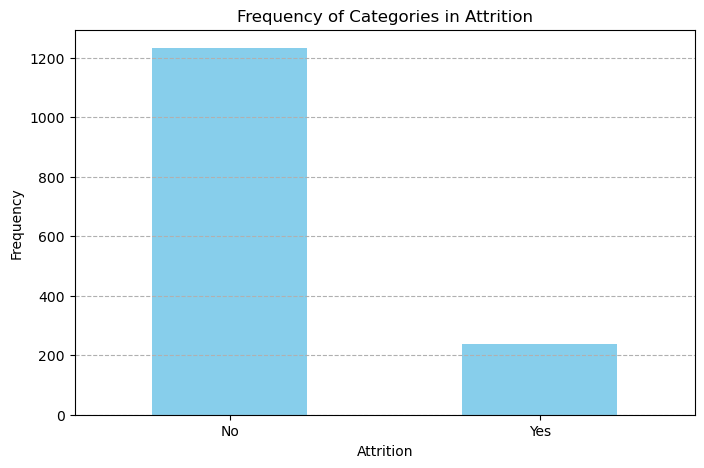

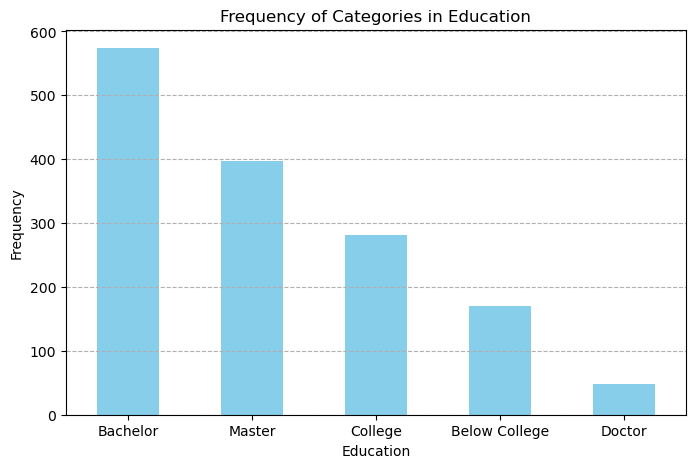

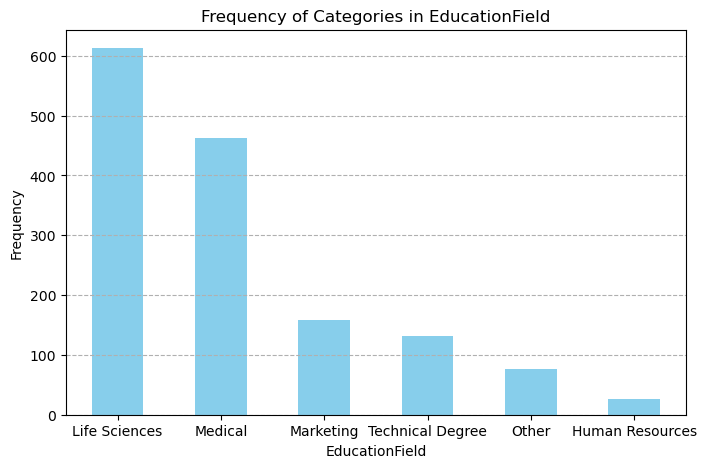

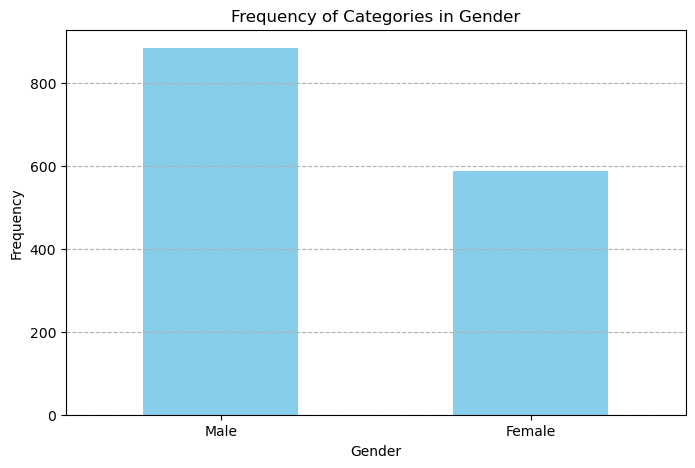

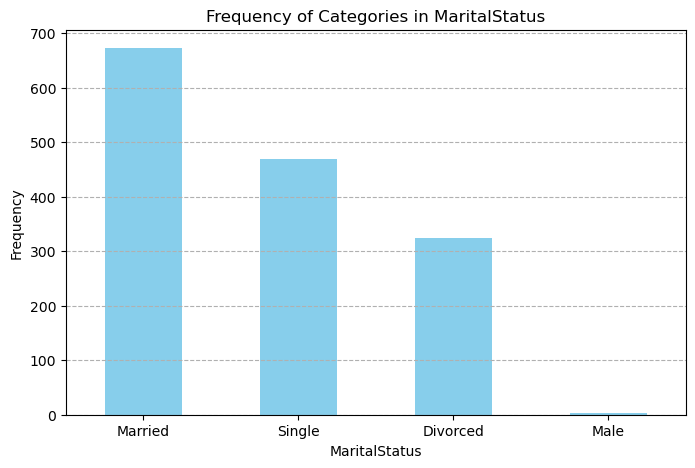

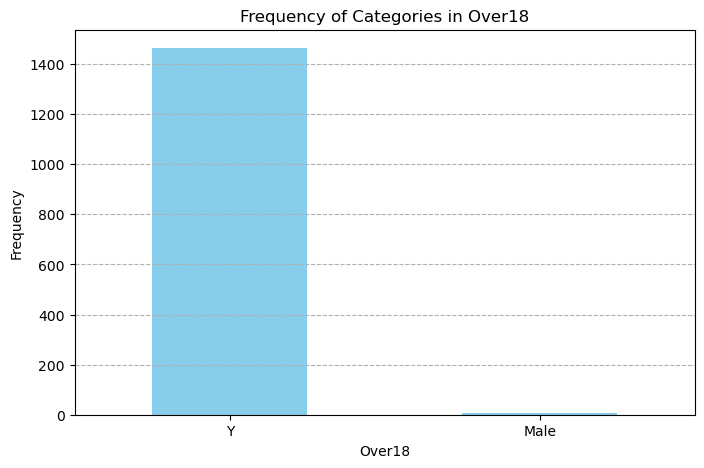

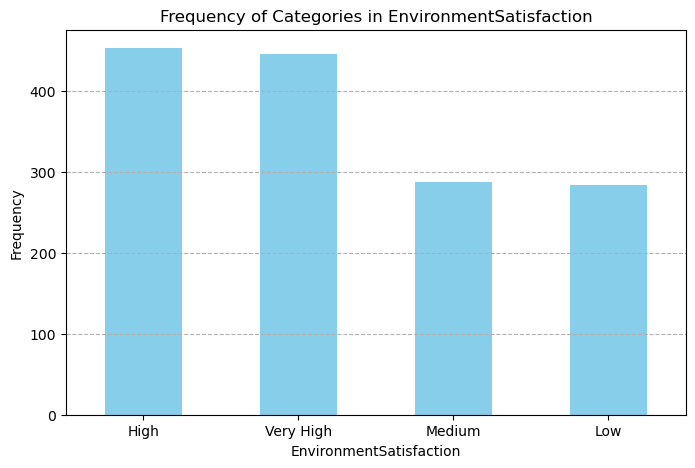

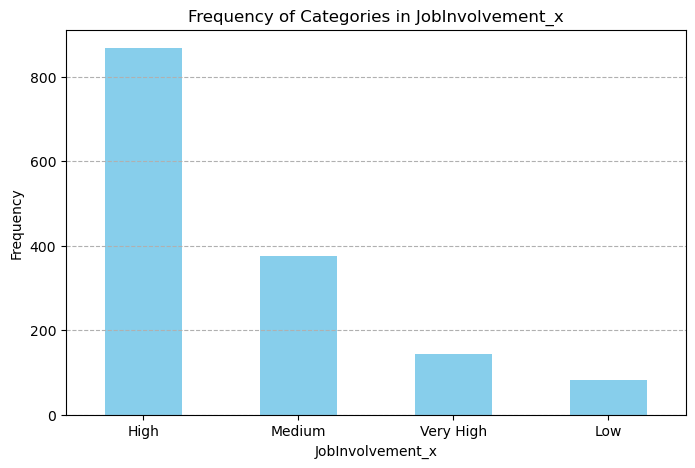

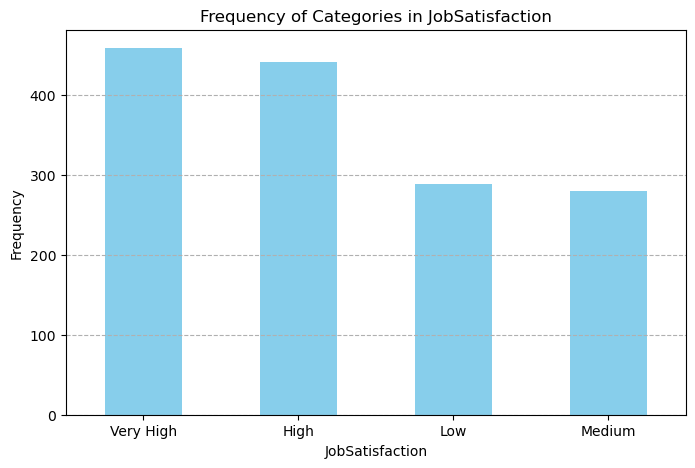

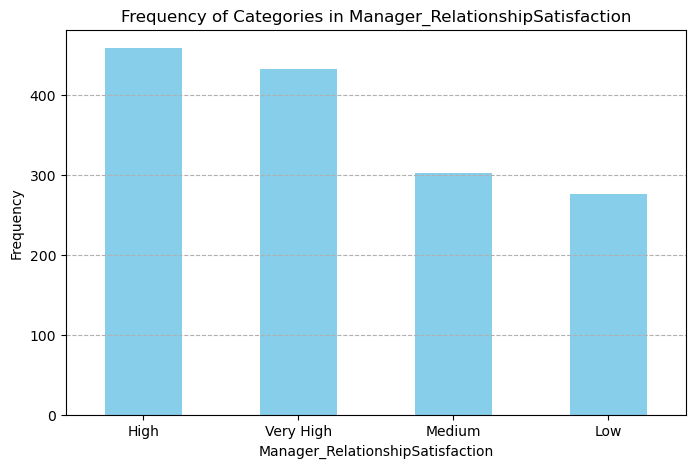

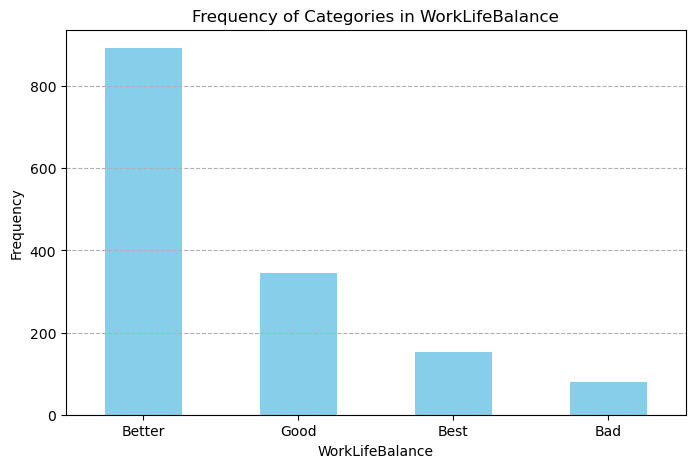

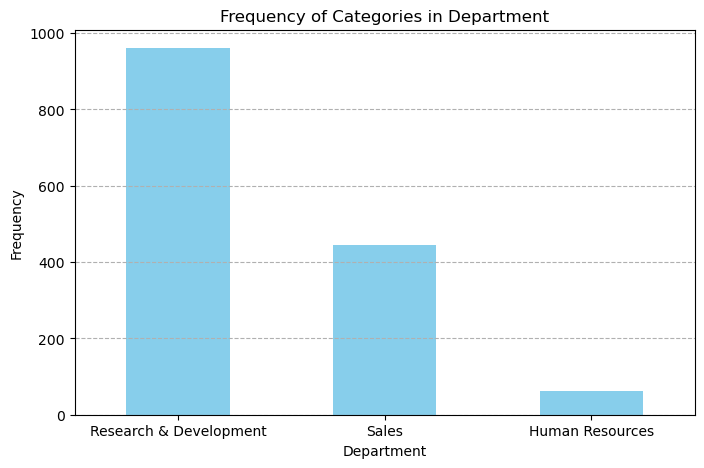

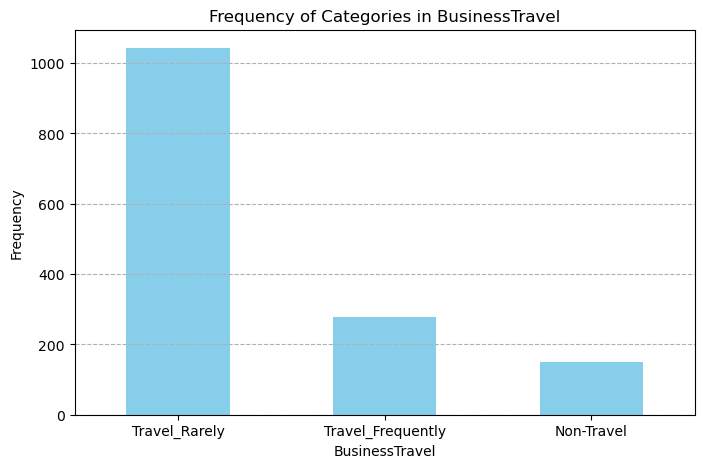

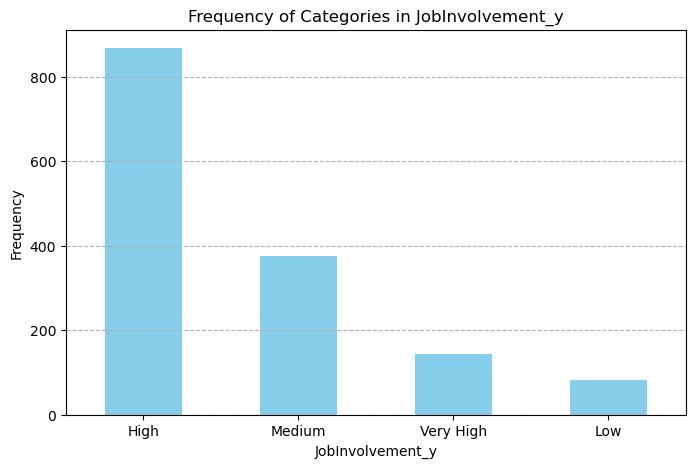

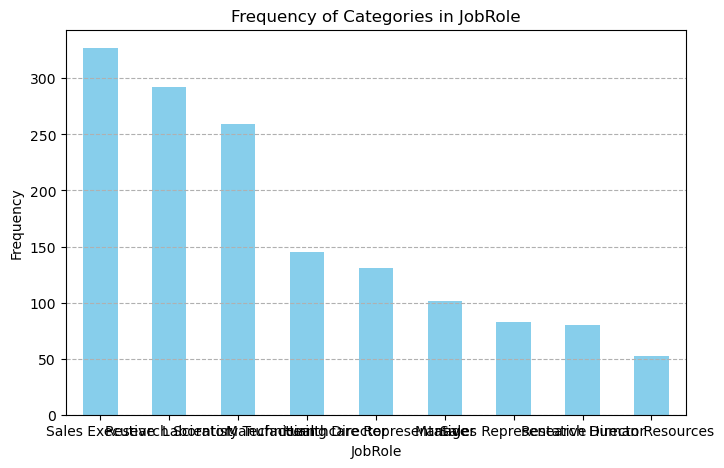

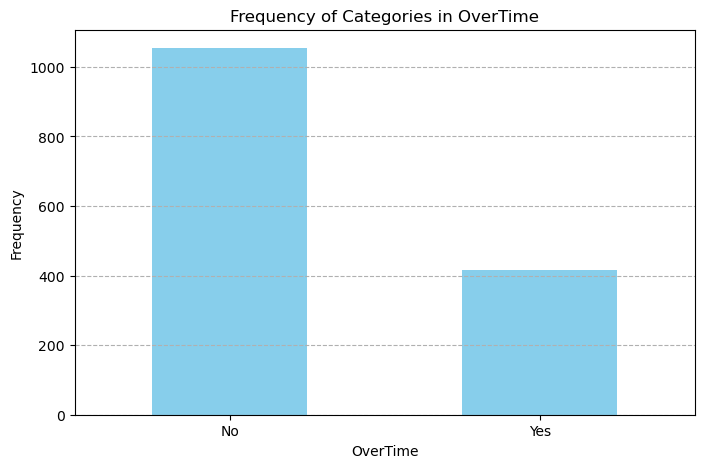

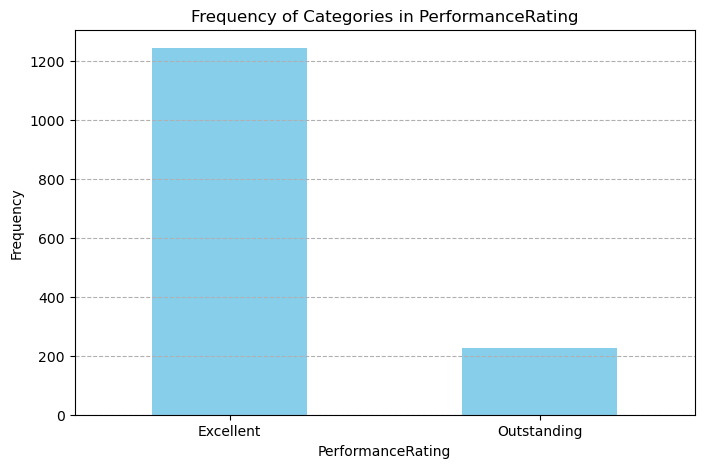

In [36]:
plot_barcharts(final_data)

In [37]:
final_data.isna().sum()

EmployeeNumber                      0
Attrition                           0
Age                                 0
Education                           0
EducationField                      0
Gender                              0
MaritalStatus                       0
Over18                              0
EnvironmentSatisfaction             0
JobInvolvement_x                    0
JobSatisfaction                     0
Manager_RelationshipSatisfaction    0
WorkLifeBalance                     0
Department                          0
BusinessTravel                      0
DistanceFromHome                    0
JobInvolvement_y                    0
JobLevel                            0
JobRole                             0
MonthlySalary                       0
NumCompaniesWorked                  0
OverTime                            0
PercentSalaryHike_last_year         0
PerformanceRating                   0
StockOptionLevel                    0
TrainingTimesLastYear               0
YearsAtCompa

In [40]:
final_data.shape

(1470, 30)

In [38]:
final_data.head()

,EmployeeNumber,Attrition,Age,Education,EducationField,Gender,MaritalStatus,Over18,EnvironmentSatisfaction,JobInvolvement_x,...,NumCompaniesWorked,OverTime,PercentSalaryHike_last_year,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41.0,College,Life Sciences,Female,Single,Y,Medium,High,...,8.0,Yes,11.0,Excellent,0.0,0,6,4,0,5
1,4,Yes,37.0,College,Other,Male,Single,Y,Very High,Medium,...,6.0,Yes,15.0,Excellent,0.0,3,0,0,0,0
2,19,Yes,28.0,Bachelor,Life Sciences,Male,Single,Y,High,Medium,...,5.0,Yes,14.0,Excellent,0.0,4,4,2,0,3
3,27,Yes,36.0,Master,Life Sciences,Male,Single,Y,High,Medium,...,7.0,No,23.0,Outstanding,0.0,4,5,3,0,3
4,31,Yes,34.0,Below College,Medical,Male,Single,Y,Medium,High,...,2.0,No,11.0,Excellent,0.0,2,4,2,1,3


In [123]:
import csv

# Save final_data as csv

final_data.to_csv('final_data.csv', index=False)


In [39]:
final_data.to_excel('final_data.xlsx', index=False)


In [98]:
#Encode the final_data 

import pandas as pd

def encode_categorical(dataframe, label_encode_cols=None, one_hot_encode_cols=None):

    df_encoded = final_data.copy()
    
    # Label Encoding
    if label_encode_cols:
        for col in label_encode_cols:
            df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0, 'Female':1, 'Male':0, 'Excellent':1, 'Outstanding': 0})
    
    # One-Hot Encoding
    if one_hot_encode_cols:
        df_encoded = pd.get_dummies(df_encoded, columns=one_hot_encode_cols, drop_first=True)
        df_encoded = df_encoded.fillna(0).astype(int)

    
    return df_encoded



# Define the columns for encoding
label_encode_cols = ['Attrition', 'Over18', 'OverTime',  'Gender', 'PerformanceRating']
one_hot_encode_cols = ['Education', 'EducationField', 'Gender', 'MaritalStatus', 
                       'EnvironmentSatisfaction', 'JobInvolvement_x','JobSatisfaction', 'BusinessTravel',
                       'Manager_RelationshipSatisfaction', 'WorkLifeBalance',  'Department', 'JobInvolvement_y', 'JobLevel', 'JobRole' ]

# Encode the DataFrame
encoded_df = encode_categorical(final_data, label_encode_cols, one_hot_encode_cols)



In [99]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   EmployeeNumber                              1470 non-null   int32
 1   Attrition                                   1470 non-null   int32
 2   Age                                         1470 non-null   int32
 3   Over18                                      1470 non-null   int32
 4   DistanceFromHome                            1470 non-null   int32
 5   MonthlySalary                               1470 non-null   int32
 6   NumCompaniesWorked                          1470 non-null   int32
 7   OverTime                                    1470 non-null   int32
 8   PercentSalaryHike_last_year                 1470 non-null   int32
 9   PerformanceRating                           1470 non-null   int32
 10  StockOptionLevel                    

In [100]:

# Correlation of demographic variables with Attrition

demographic_cols = ['Age', 'Over18', 'DistanceFromHome','Over18', 'Gender_1',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree']

# Calculate correlations
demographic_corr = encoded_df[demographic_cols + ['Attrition']].corr()

# Display the correlation matrix for satisfaction variables
print("Correlation between satisfaction variables and Attrition:")
print(demographic_corr['Attrition'].sort_values(ascending=False))

#We can see demographic factors like-Marital status, distance from home etc have a big influence on Attrition.

Correlation between satisfaction variables and Attrition:
Attrition                          1.000000
MaritalStatus_Single               0.172189
DistanceFromHome                   0.082528
EducationField_Technical Degree    0.069355
EducationField_Marketing           0.056899
Over18                             0.028067
Over18                             0.028067
Education_Below College            0.020777
Education_College                 -0.010840
EducationField_Other              -0.020046
Education_Master                  -0.025024
Education_Doctor                  -0.028507
Gender_1                          -0.028853
EducationField_Life Sciences      -0.033131
EducationField_Medical            -0.046384
MaritalStatus_Married             -0.090984
Age                               -0.158636
Name: Attrition, dtype: float64


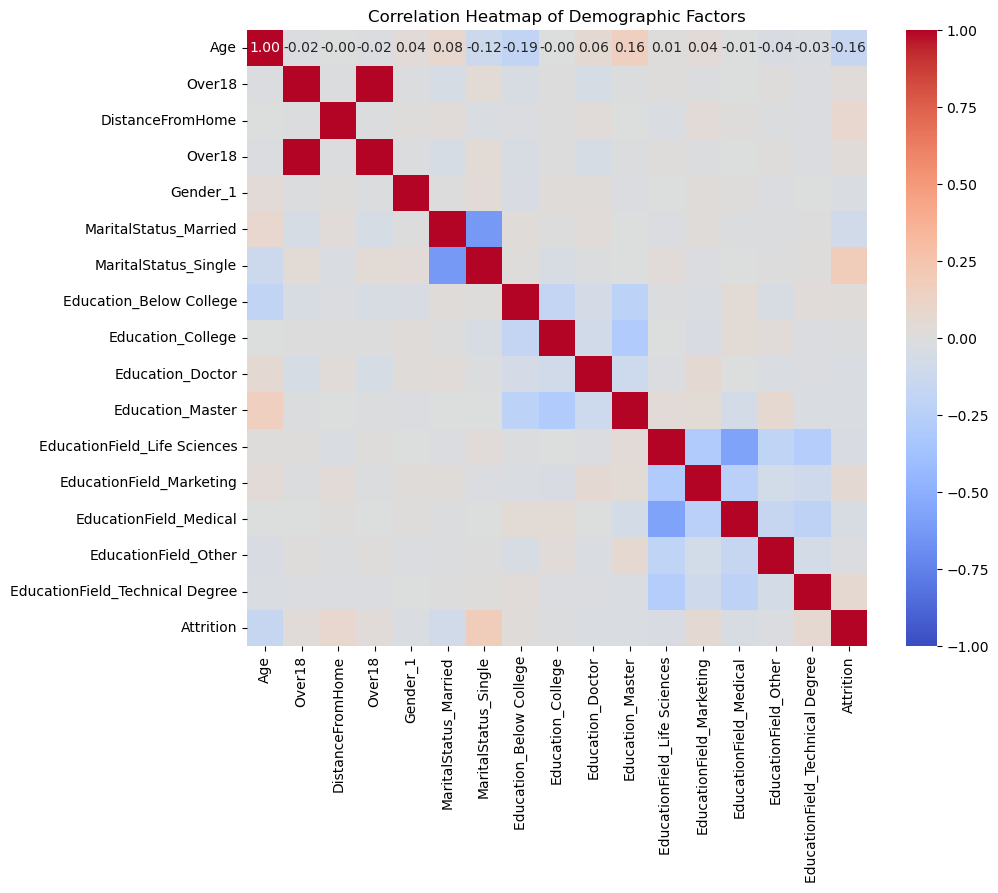

In [101]:
# Visualize correlation with a heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(demographic_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Demographic Factors')
plt.show()

In [102]:
# Correlation of satisfaction variables with Attrition

satisfaction_cols = ['EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
                     'JobSatisfaction_Low', 'JobSatisfaction_Medium',
       'JobSatisfaction_Very High', 'Manager_RelationshipSatisfaction_Low',
       'Manager_RelationshipSatisfaction_Medium',
       'Manager_RelationshipSatisfaction_Very High','Manager_RelationshipSatisfaction_Low',
       'Manager_RelationshipSatisfaction_Medium']

# Calculate correlations
satisfaction_corr = encoded_df[satisfaction_cols + ['Attrition']].corr()

# Display the correlation matrix for satisfaction variables
print("Correlation between satisfaction variables and Attrition:")
print(satisfaction_corr['Attrition'].sort_values(ascending=False))

# WE can see satisfaction variables like Environment satisfaction, job satisfaction etc have influence on attrition

Correlation between satisfaction variables and Attrition:
Attrition                                     1.000000
EnvironmentSatisfaction_Low                   0.122819
JobSatisfaction_Low                           0.090329
Manager_RelationshipSatisfaction_Low          0.059222
Manager_RelationshipSatisfaction_Low          0.059222
JobSatisfaction_Medium                        0.004038
EnvironmentSatisfaction_Medium               -0.015267
Manager_RelationshipSatisfaction_Medium      -0.017611
Manager_RelationshipSatisfaction_Medium      -0.017611
Manager_RelationshipSatisfaction_Very High   -0.022940
JobSatisfaction_Very High                    -0.087830
Name: Attrition, dtype: float64


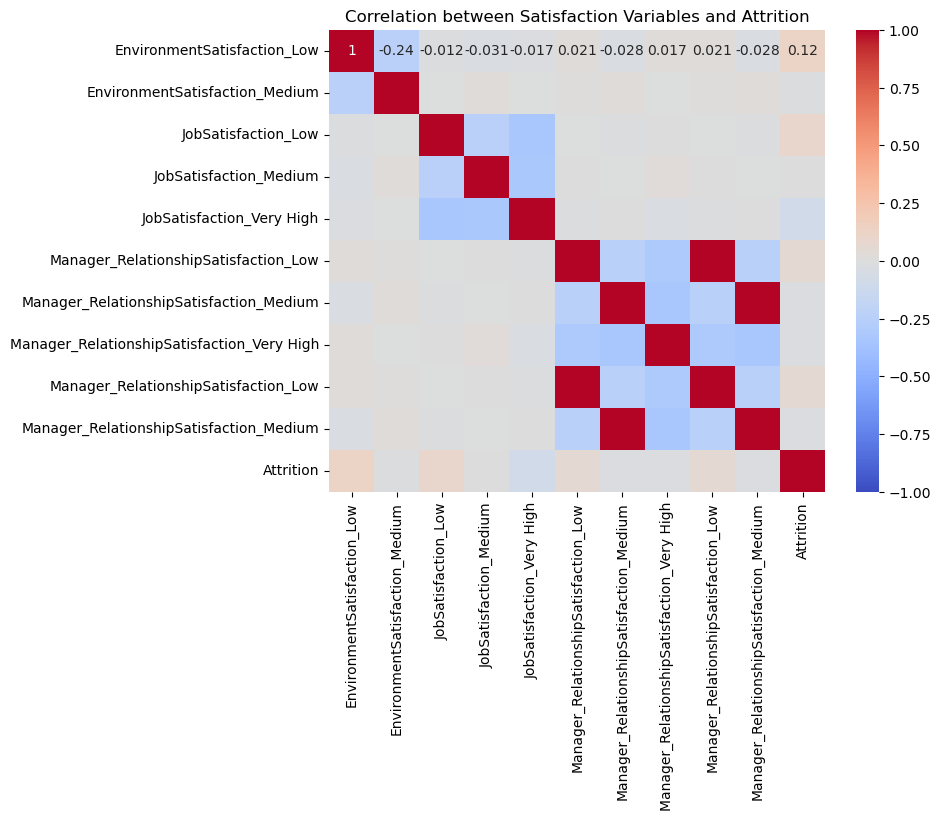

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(satisfaction_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Satisfaction Variables and Attrition')
plt.show()


In [104]:
# Correlation of job related variables with Attrition

job_cols = ['MonthlySalary', 'OverTime', 'WorkLifeBalance_Best',
       'WorkLifeBalance_Better', 'WorkLifeBalance_Good','BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobLevel_2.0', 'JobLevel_3.0',
       'JobLevel_4.0', 'JobLevel_5.0', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative']

# Calculate correlations
job_corr = encoded_df[job_cols + ['Attrition']].corr()

# Display the correlation matrix for satisfaction variables
print("Correlation between satisfaction variables and Attrition:")
print(job_corr['Attrition'].sort_values(ascending=False))

# WE can see job variables like Overtime, JobRole_Sales Representative,BusinessTravel_Travel_Frequently etc have influence on attrition

Correlation between satisfaction variables and Attrition:
Attrition                           1.000000
OverTime                            0.246118
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
JobRole_Human Resources             0.036215
JobRole_Sales Executive             0.019036
WorkLifeBalance_Best                0.014131
WorkLifeBalance_Good                0.011093
JobRole_Research Scientist         -0.000360
JobLevel_3.0                       -0.016380
YearsSinceLastPromotion            -0.033019
BusinessTravel_Travel_Rarely       -0.049538
JobLevel_5.0                       -0.053566
WorkLifeBalance_Better             -0.064301
JobRole_Manager                    -0.082518
JobRole_Manufacturing Director     -0.082994
JobLevel_4.0                       -0.086461
JobRole_Research Director          -0.088870
JobLevel_2.0                       -0.131706
YearsAtCompany                     -0.1343

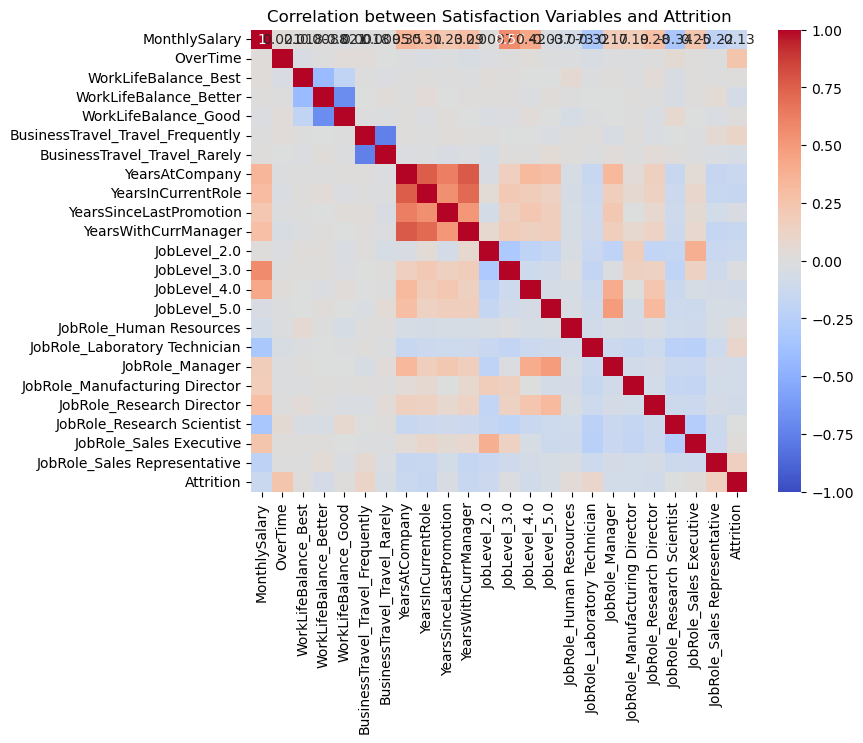

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(job_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Satisfaction Variables and Attrition')
plt.show()


# Data Analysis

In [106]:
final_data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'Education', 'EducationField',
       'Gender', 'MaritalStatus', 'Over18', 'EnvironmentSatisfaction',
       'JobInvolvement_x', 'JobSatisfaction',
       'Manager_RelationshipSatisfaction', 'WorkLifeBalance', 'Department',
       'BusinessTravel', 'DistanceFromHome', 'JobInvolvement_y', 'JobLevel',
       'JobRole', 'MonthlySalary', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike_last_year', 'PerformanceRating', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

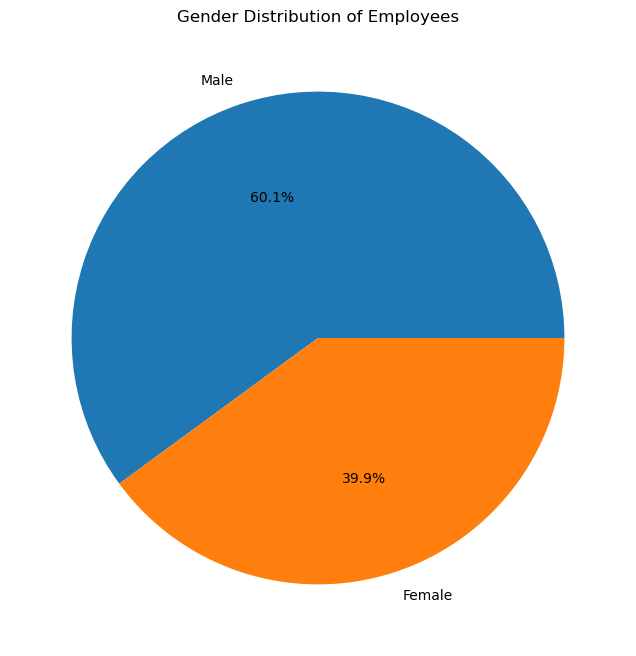

In [107]:
#Gender Distribution of Employees 

gender_distribution = final_data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution of Employees')
plt.ylabel('')
plt.show()

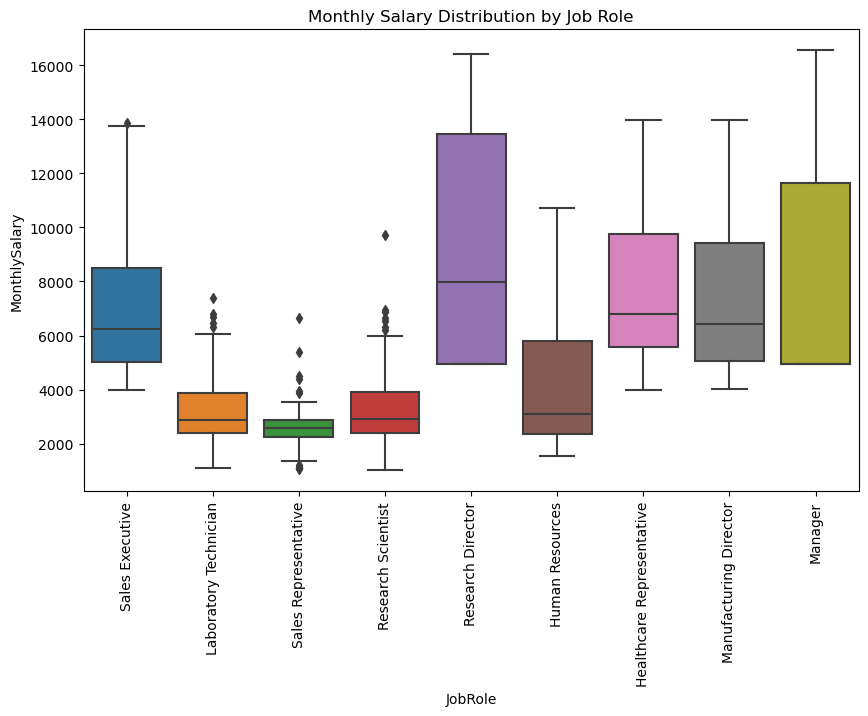

In [108]:
# 2. Average Monthly Salary by Job Role (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='MonthlySalary', data=final_data)
plt.xticks(rotation=90)
plt.title('Monthly Salary Distribution by Job Role')
plt.show()

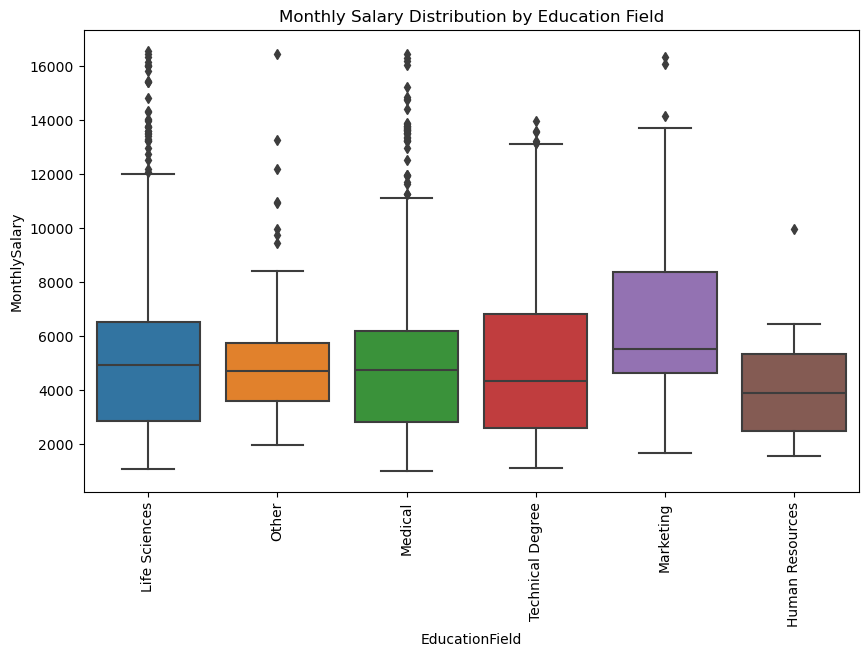

In [109]:
# Monthly Salary Distribution by Education Field

plt.figure(figsize=(10, 6))
sns.boxplot(x='EducationField', y='MonthlySalary', data=final_data)
plt.xticks(rotation=90)
plt.title('Monthly Salary Distribution by Education Field')
plt.show()

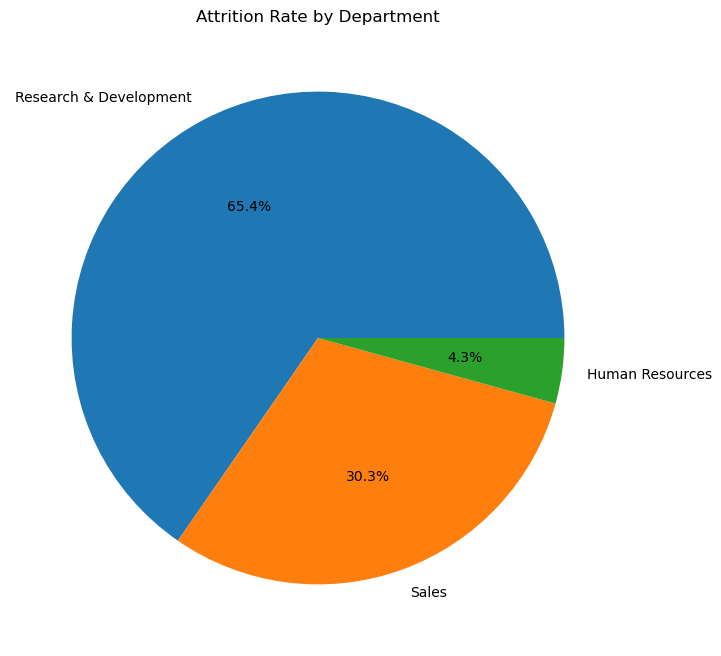

In [110]:

# 1. Attrition Rate by Department (Pie Chart)
attrition_by_department = final_data.groupby('Department')['Attrition'].count().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
attrition_by_department.plot(kind='pie', autopct='%1.1f%%', title='Attrition Rate by Department')
plt.ylabel('')  # Removes the y-label for better readability
plt.show()

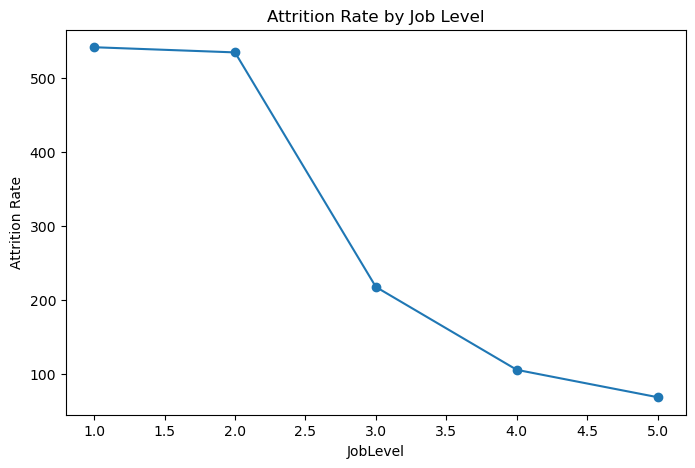

In [111]:
# 3. Attrition Rate by Job Level (Line Plot)
attrition_by_joblevel = final_data.groupby('JobLevel')['Attrition'].count().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
attrition_by_joblevel.plot(kind='line', marker='o', title='Attrition Rate by Job Level', ylabel='Attrition Rate')
plt.show()

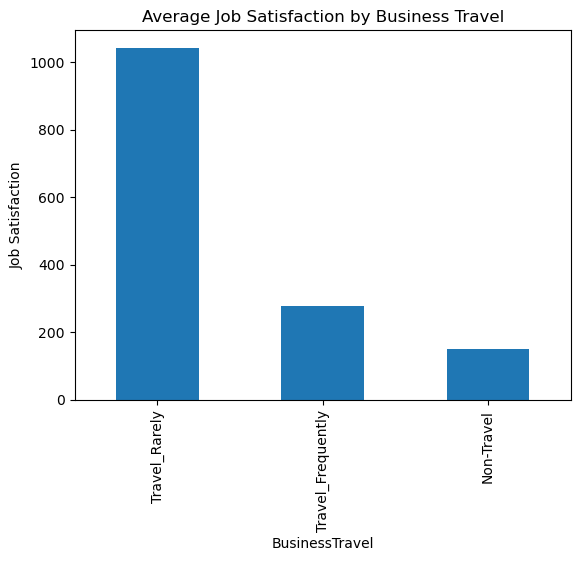

In [112]:
#Average Job Satisfaction by Business Travel


avg_jobsat_by_travel = final_data.groupby('BusinessTravel')['JobSatisfaction'].count().sort_values(ascending=False)

# Plot
avg_jobsat_by_travel.plot(kind='bar', title='Average Job Satisfaction by Business Travel', ylabel='Job Satisfaction')
plt.show()


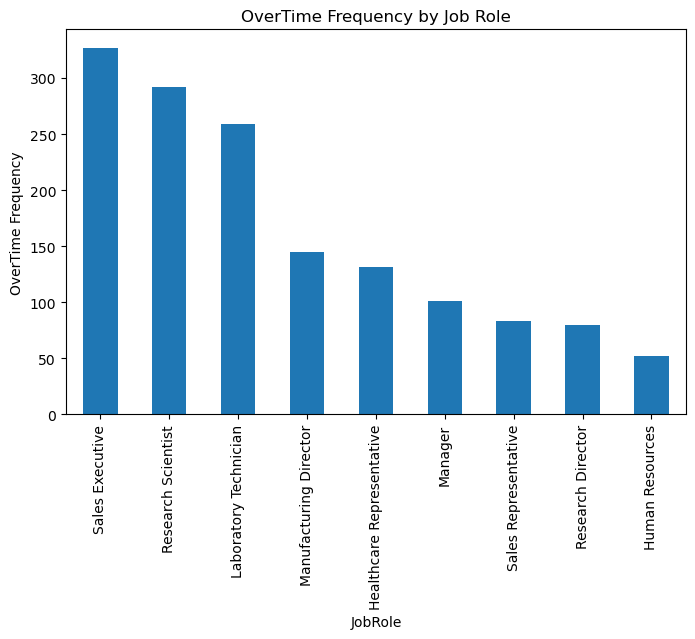

In [113]:
# OverTime Frequency by Job Role 
overtime_by_jobrole = final_data.groupby('JobRole')['OverTime'].count().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
overtime_by_jobrole.plot(kind='bar', title='OverTime Frequency by Job Role', ylabel='OverTime Frequency')
plt.show()

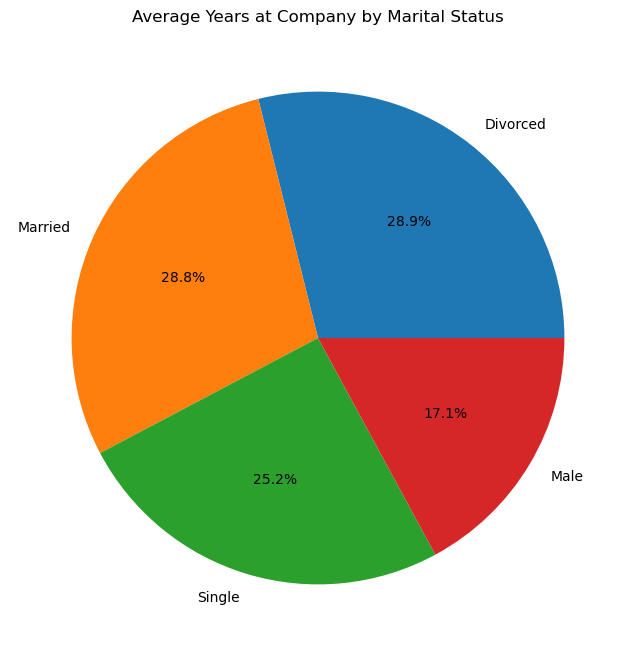

In [114]:
#Average Years at Company by Marital Status 
avg_years_by_marital_status = final_data.groupby('MaritalStatus')['YearsAtCompany'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
avg_years_by_marital_status.plot(kind='pie', autopct='%1.1f%%', title='Average Years at Company by Marital Status')
plt.ylabel('')
plt.show()

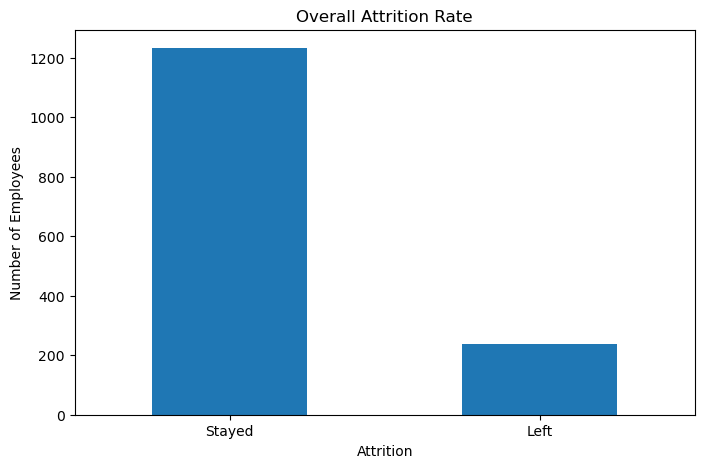

In [115]:
# Overall Attrition Rate 

import numpy as np
overall_attrition = final_data['Attrition'].value_counts()

plt.figure(figsize=(8, 5))
overall_attrition.plot(kind='bar', title='Overall Attrition Rate', ylabel='Number of Employees')
plt.xticks(ticks=np.arange(len(overall_attrition)), labels=['Stayed', 'Left'], rotation=0)
plt.show()

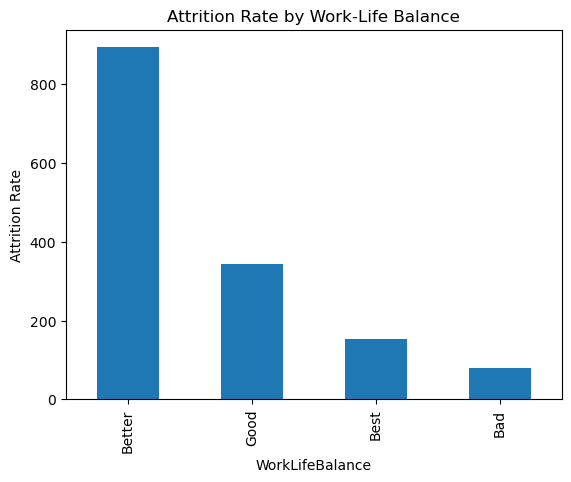

In [116]:
# Attrition Rate by Work-Life Balance

attrition_by_wlb = final_data.groupby('WorkLifeBalance')['Attrition'].count().sort_values(ascending=False)

# Plot
attrition_by_wlb.plot(kind='bar', title='Attrition Rate by Work-Life Balance', ylabel='Attrition Rate')
plt.show()


Department
Sales                     2.354260
Research & Development    2.137357
Human Resources           1.777778
Name: YearsSinceLastPromotion, dtype: float64


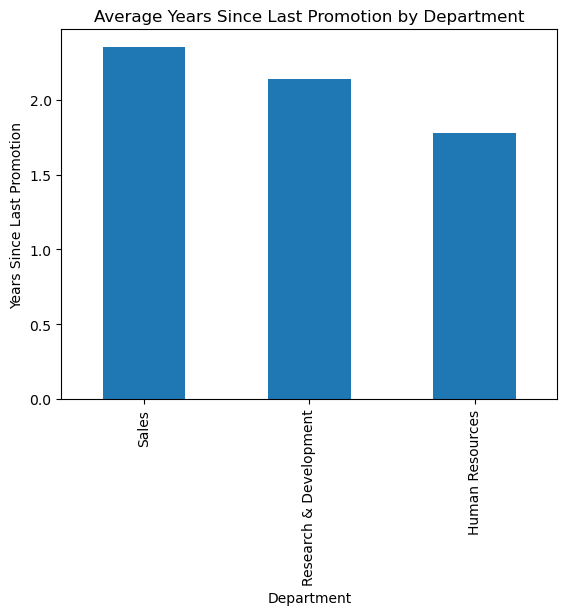

In [117]:
#Average years since last promotion by department

years_promo_by_department = final_data.groupby('Department')['YearsSinceLastPromotion'].mean().sort_values(ascending=False)
print(years_promo_by_department)

# Plot
years_promo_by_department.plot(kind='bar', title='Average Years Since Last Promotion by Department', ylabel='Years Since Last Promotion')
plt.show()


JobSatisfaction
Very High    459
High         442
Low          289
Medium       280
Name: Attrition, dtype: int64


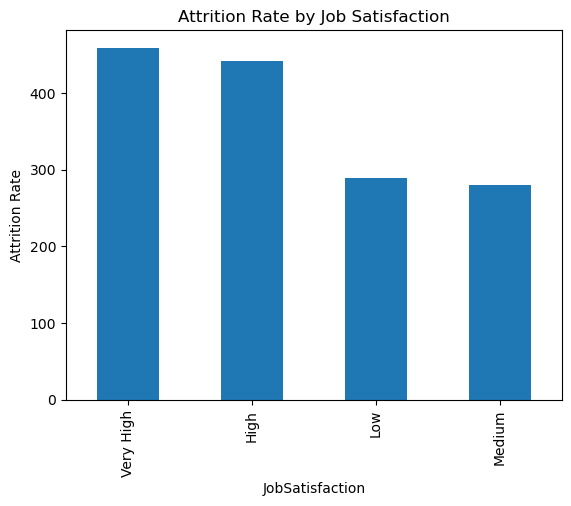

In [118]:
#Attrition rate by job satisfaction

attrition_by_jobsat = final_data.groupby('JobSatisfaction')['Attrition'].count().sort_values(ascending=False)
print(attrition_by_jobsat)

# Plot
attrition_by_jobsat.plot(kind='bar', title='Attrition Rate by Job Satisfaction', ylabel='Attrition Rate')
plt.show()


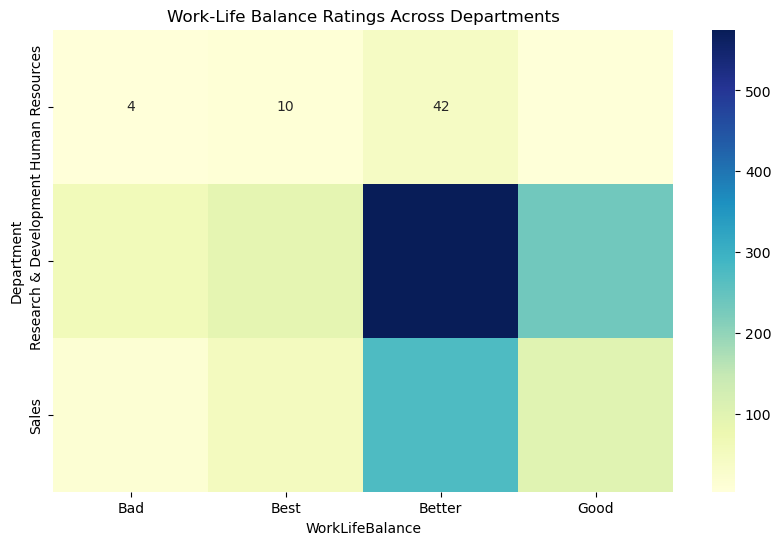

In [119]:
#Work-Life Balance Ratings Across Departments 

worklife_balance = final_data.groupby(['Department', 'WorkLifeBalance']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(worklife_balance, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Work-Life Balance Ratings Across Departments')
plt.show()